In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
plt.style.use('dark_background')


In [30]:
df = pd.read_csv("C:/Users/HP/Downloads/archive/AirPassengers.csv",parse_dates=['Month'])
df.sample(8)

,Month,#Passengers
124,1959-05-01,420
103,1957-08-01,467
109,1958-02-01,318
25,1951-02-01,150
35,1951-12-01,166
79,1955-08-01,347
74,1955-03-01,267
135,1960-04-01,461


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [32]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [33]:
df.set_index('Month',inplace=True)

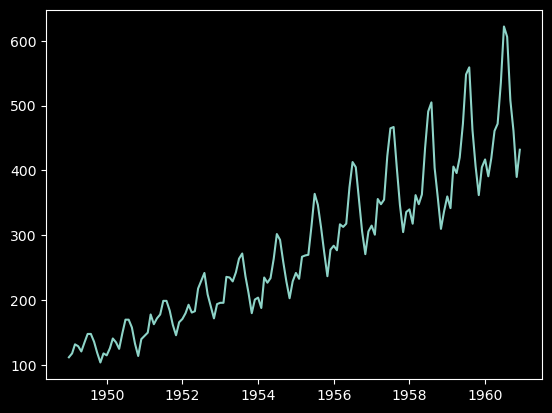

In [34]:
plt.plot(df)

In [35]:
# to check whether the data is stationary or non stationary 
# we'll use dicky fuller test 
# we require statsmodel lib for this

from statsmodels.tsa.stattools import adfuller

In [36]:
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_ = adfuller(df)
print("pvalue = " ,pvalue ,"if above 0.5 data is stationary" )
# thus data is not stationary for now

pvalue =  0.991880243437641 if above 0.5 data is stationary


In [38]:
df.sample(5)

,#Passengers
Month,
1950-07-01,170
1960-10-01,461
1957-03-01,356
1960-04-01,461
1959-07-01,548


In [44]:
# extracting year and month from data 
df['year'] = df.index.year
df['month'] = df.index.month

In [45]:
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5
...,...,...,...
1960-08-01,606,1960,8
1960-09-01,508,1960,9
1960-10-01,461,1960,10


<Axes: xlabel='year', ylabel='#Passengers'>

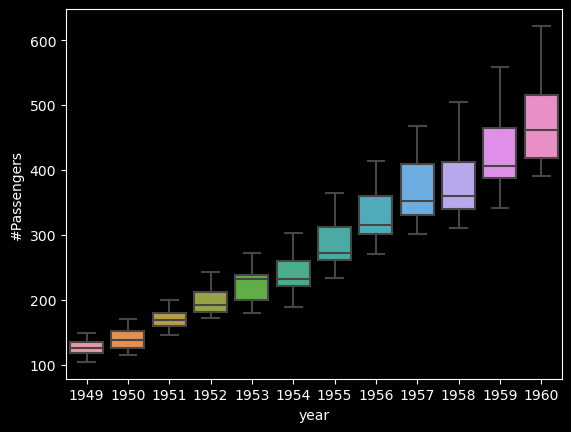

In [49]:
sns.boxplot(x ='year',y='#Passengers',data=df)
# measuring the seasonality of boxplot

<Axes: xlabel='month', ylabel='#Passengers'>

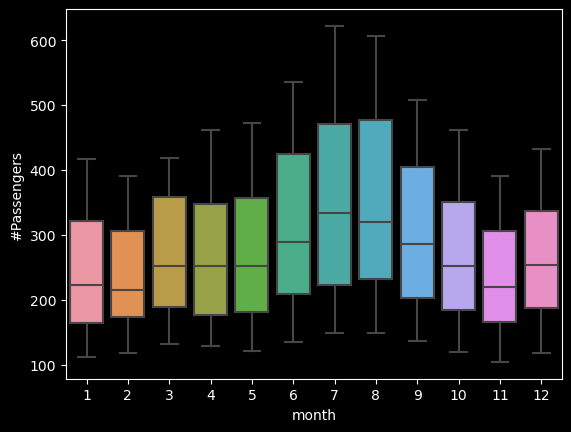

In [50]:
sns.boxplot(x ='month',y='#Passengers',data=df)

In [53]:
# extracting trean,seasonal and residuals through statmodel lib
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
decompose= seasonal_decompose(df['#Passengers'],model='additive')
# to extract trends,seasonality,residuals from above decomposed

In [62]:
trend = decompose.trend
seasonal = decompose.seasonal
residuals = decompose.resid

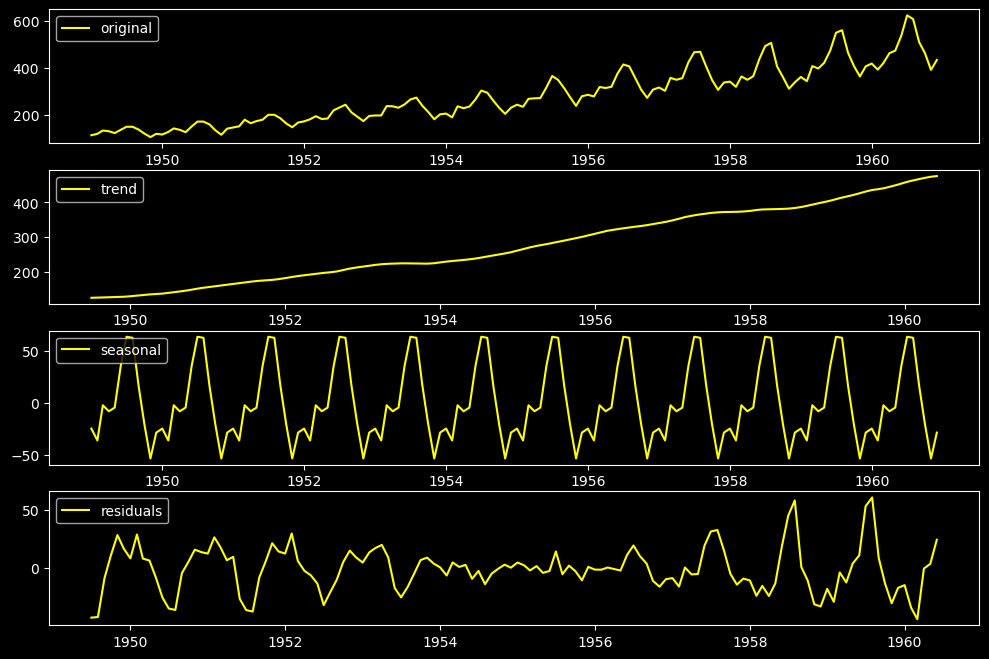

In [64]:
# plotting the data
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'],label='original',color='yellow')
plt.legend(loc= 'upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='yellow')
plt.legend(loc= 'upper left')
plt.subplot(413)
plt.plot(seasonal,label='seasonal',color='yellow')
plt.legend(loc= 'upper left')
plt.subplot(414)
plt.plot(residuals,label='residuals',color='yellow')
plt.legend(loc= 'upper left')

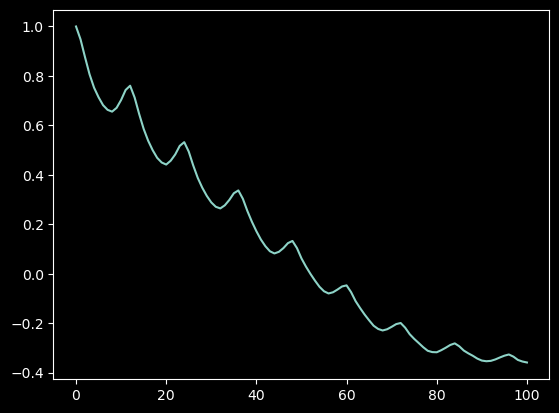

In [66]:
# autoregression means correlation of an object with it's own lags
from statsmodels.tsa.stattools import acf
acf = acf(df['#Passengers'],nlags = 100)
plt.plot(acf)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

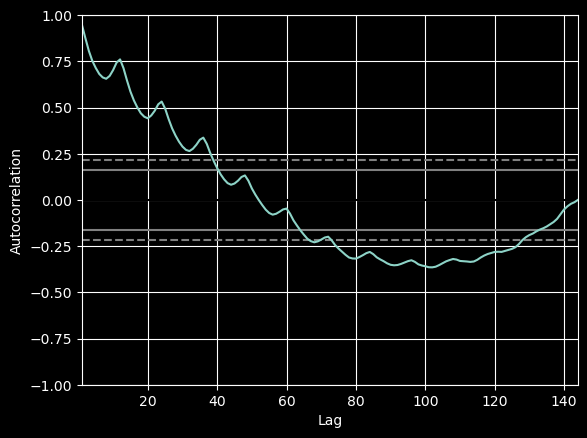

In [69]:
# or we can use
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['#Passengers'])

In [ ]:
# any lags below 40 is positive and else negative